# Data Mining



In [10]:
import os

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np

from scipy import stats

import openpyxl

## Data Preparation

C:\Users\maria\AppData\Local\Temp\ipykernel_14716\4207791906.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  bin_mode = stats.mode(bin_values[bin_values > 0]).mode[0]
C:\Users\maria\AppData\Local\Temp\ipykernel_14716\4207791906.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())
C:\Users\maria\AppData\Local\Temp\ipykernel_14716\4207791906.py:115: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the 

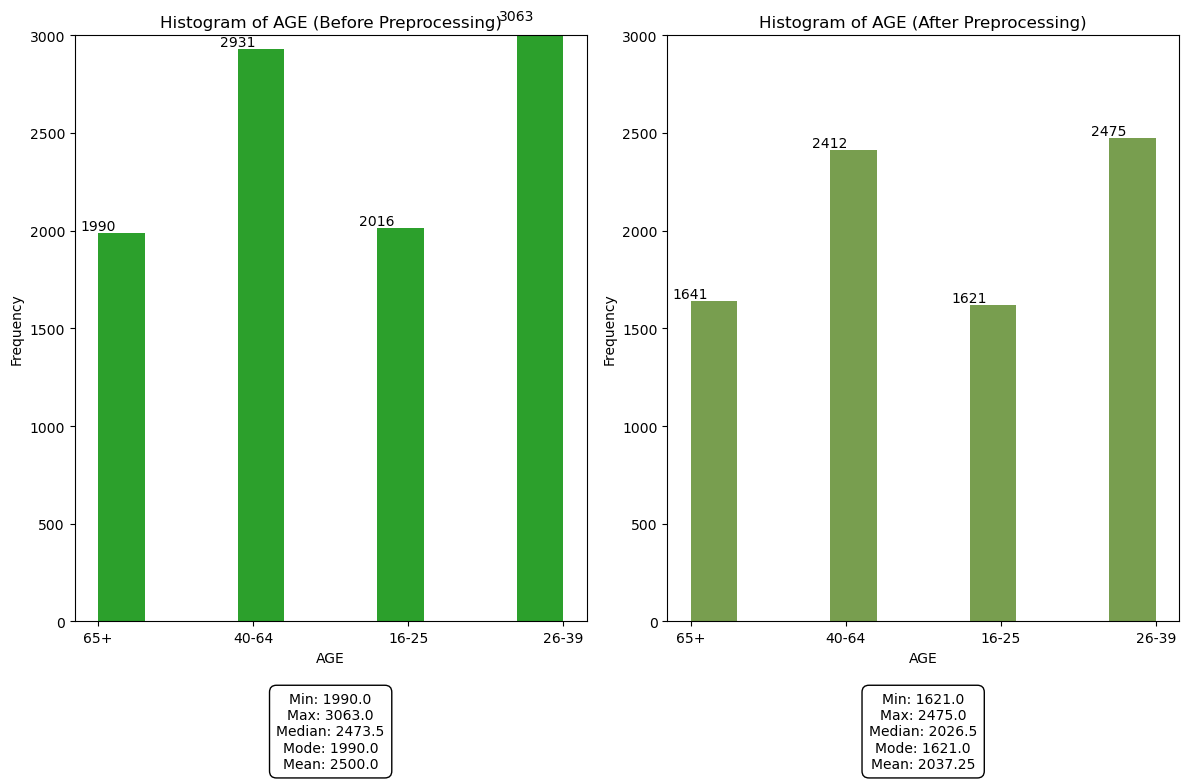

In [2]:
# Load dataset into pandas DataFrame
df = pd.read_csv('resit_dataset_prepared.csv')

# Variables to plot histograms
variable_names = ['AGE']

    # list of variables for easy access to plot histograms
    #'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'HAS_OWN_VEHICLE',
    #'VEHICLE_YEAR', 'IS_MARRIED', 'HAS_CHILDREN', 'COUNTRY', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
    #'DRIVING_UNDER_INFLUENCE', 'PAST_ACCIDENTS'

# Define number of subplots based on the number of variables
num_variables = len(variable_names)

# Create a new figure with subplots for each variable
fig, axes = plt.subplots(num_variables, 2, figsize=(12, 8))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate over variables and plot histograms
for i, variable in enumerate(variable_names):
    # Plot the histogram before preprocessing
    axes[i*2].hist(df[variable], bins=10)
    axes[i*2].set_title(f'Histogram of {variable} (Before Preprocessing)')
    axes[i*2].set_xlabel(variable)
    axes[i*2].set_ylabel('Frequency')

    # Calculate the frequencies of each bin
    frequencies, bin_edges, _ = axes[i*2].hist(df[variable], bins=10)

    # Add value annotations to each bar
    for frequency, bin_edge in zip(frequencies, bin_edges):
        if frequency > 0:
            axes[i*2].text(bin_edge, frequency, str(int(frequency)), ha='center', va='bottom')

    # Calculate the statistics for each bin (ignoring bins with value 0)
    values_before = df[variable]
    bin_values, bin_edges, _ = axes[i*2].hist(values_before, bins=10)

    bin_min = np.min(bin_values[bin_values > 0])
    bin_max = np.max(bin_values)
    bin_median = np.median(bin_values[bin_values > 0])
    bin_mode = stats.mode(bin_values[bin_values > 0]).mode[0]
    bin_mean = np.mean(bin_values[bin_values > 0])

    # Add statistics annotations to the plot
    stats_text = f"Min: {bin_min}\nMax: {bin_max}\nMedian: {bin_median}\nMode: {bin_mode}\nMean: {bin_mean}"
    axes[i*2].text(0.5, -0.25, stats_text, ha='center', transform=axes[i*2].transAxes,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # ==PREPROCESSING STEPS==
    
    # 1. Drop rows with missing values
    df = df.dropna()
    
    # 2. Drop collumns with missing values
    df = df.dropna(axis=1)
    
    # 3. Fill missing values with median
    df = df.fillna(df.median())
    
    # 4. Check and remove duplicate rows
    df = df.drop_duplicates()
    
    # 5. Correct and replace mis-typed values
    df['GENDER'] = df['GENDER'].replace('m', 'male')
    df['GENDER'] = df['GENDER'].replace('f', 'female')
    df['EDUCATION'] = df['EDUCATION'].replace('hs', 'high school')
    df['EDUCATION'] = df['EDUCATION'].replace('na', 'none')
    
    # 6. Data Transformation and Scaling
    
    # 6.1 For Discrete Nominal Variables: one-hot encoding to represent each category as binary indicators
    nominal_variables = ['AGE', 'GENDER', 'RACE', 'INCOME', 'DRIVING_EXPERIENCE', 'EDUCATION', 'HAS_OWN_VEHICLE', 'VEHICLE_YEAR', 'IS_MARRIED', 'HAS_CHILDREN', 'COUNTRY', 'VEHICLE_TYPE', 'DRIVING_UNDER_INFLUENCE']
    encoded_df = pd.get_dummies(df, columns=nominal_variables)
    
    # 6.2 For Continuous Variables: normalization to ensure variables have similar ranges and distributions
    continuous_variables = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
    scaler = MinMaxScaler()
    df[continuous_variables] = scaler.fit_transform(df[continuous_variables])
    
    # 6.3 Discrete Variables: label encoding
    discrete_variables = ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']
    encoder = LabelEncoder()
    df[discrete_variables] = df[discrete_variables].apply(encoder.fit_transform)

    # ==END OF PREPROCESSING STEPS==
    
    
    # Split the data into Training and Testing datasets
    train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)
    
    # Plot the histogram after preprocessing
    axes[i*2+1].hist(df[variable], bins=10, alpha=0.5)
    axes[i*2+1].set_title(f'Histogram of {variable} (After Preprocessing)')
    axes[i*2+1].set_xlabel(variable)
    axes[i*2+1].set_ylabel('Frequency')

    # Calculate the frequencies of each bin
    frequencies, bin_edges, _ = axes[i*2+1].hist(df[variable], bins=10, alpha=0.5)

    # Add value annotations to each bar
    for frequency, bin_edge in zip(frequencies, bin_edges):
        if frequency > 0:
            axes[i*2+1].text(bin_edge, frequency, str(int(frequency)), ha='center', va='bottom')

    # Calculate the statistics for each bin (ignoring bins with value 0)
    values_after = df[variable]
    bin_values, bin_edges, _ = axes[i*2+1].hist(values_after, bins=10, alpha=0.5)

    bin_min = np.min(bin_values[bin_values > 0])
    bin_max = np.max(bin_values)
    bin_median = np.median(bin_values[bin_values > 0])
    bin_mode = stats.mode(bin_values[bin_values > 0]).mode[0]
    bin_mean = np.mean(bin_values[bin_values > 0])

    # Add statistics annotations to the plot
    stats_text = f"Min: {bin_min}\nMax: {bin_max}\nMedian: {bin_median}\nMode: {bin_mode}\nMean: {bin_mean}"
    axes[i*2+1].text(0.5, -0.25, stats_text, ha='center', transform=axes[i*2+1].transAxes,
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    if variable == 'AGE':
        # Set y-axis range and ticks for AGE variable
        axes[i*2].set_ylim(0, 3000)
        axes[i*2].set_yticks(range(0, 3001, 500))
        axes[i*2+1].set_ylim(0, 3000)
        axes[i*2+1].set_yticks(range(0, 3001, 500))  
        

# Hide empty subplots if there are fewer variables than subplots
if num_variables < len(axes):
    for j in range(num_variables*2, len(axes)):
        fig.delaxes(axes[j])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [3]:
# Label encode categorical variables
categorical_features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'HAS_OWN_VEHICLE',
    'VEHICLE_YEAR', 'IS_MARRIED', 'HAS_CHILDREN', 'COUNTRY', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
    'DRIVING_UNDER_INFLUENCE', 'PAST_ACCIDENTS']
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Print unique values in each categorical column
for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f"Unique values in {feature}: {unique_values}")

# Split the data into input features (X) and the target variable (y)
X = df.drop('HAS_CLAIMED_INSURANCE', axis=1)  # Update with the actual name of the target variable column
y = df['HAS_CLAIMED_INSURANCE']  # Update with the actual name of the target variable column

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Update test_size and random_state as desired


Unique values in AGE: [3 2 0 1]
Unique values in GENDER: [0 1]
Unique values in RACE: [0 1]
Unique values in DRIVING_EXPERIENCE: [1 2 0 3]
Unique values in EDUCATION: [2 0 1]
Unique values in INCOME: [2 3 1 0]
Unique values in CREDIT_SCORE: [2741 6624 4165 ... 3493 3002 1865]
Unique values in HAS_OWN_VEHICLE: [0 1]
Unique values in VEHICLE_YEAR: [1 0]
Unique values in IS_MARRIED: [1 0]
Unique values in HAS_CHILDREN: [1 0]
Unique values in COUNTRY: [1 0]
Unique values in ANNUAL_MILEAGE: [10 15  8 13  9 14 17 11 12  6 16  7  5  4 19 18 20  2  3  0  1 21 22]
Unique values in VEHICLE_TYPE: [0 1]
Unique values in SPEEDING_VIOLATIONS: [ 1  4  0  2  3  5  9  6 10 11  7  8 14 12 19 15 20 16 17 13 18 21]
Unique values in DRIVING_UNDER_INFLUENCE: [0 1 3 2 4 5 6]
Unique values in PAST_ACCIDENTS: [ 0  4  2  1  3  6  8  5 10  7 11  9 14 13 12 15]


## Modelling  
### Decision Tree

In [4]:
# Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Define the hyperparameters to try
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Create a table to store the results
results = []

# Iterate over all combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Create an instance of the DecisionTreeClassifier with the current hyperparameters
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf)

            # Perform k-fold cross-validation
            k = 5  # Number of folds
            scores = cross_val_score(model, X_train, y_train, cv=k)

            # Calculate the mean accuracy score
            mean_accuracy = scores.mean()

            # Add the results to the table
            results.append([max_depth, min_samples_split, min_samples_leaf, mean_accuracy])

# Convert the results to a pandas DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'Accuracy'])
print(results_df)

    max_depth  min_samples_split  min_samples_leaf  Accuracy
0           5                  2                 1  0.843687
1           5                  2                 2  0.843380
2           5                  2                 4  0.843994
3           5                  5                 1  0.843380
4           5                  5                 2  0.843533
5           5                  5                 4  0.843994
6           5                 10                 1  0.843533
7           5                 10                 2  0.843533
8           5                 10                 4  0.843994
9          10                  2                 1  0.821751
10         10                  2                 2  0.817609
11         10                  2                 4  0.822978
12         10                  5                 1  0.818837
13         10                  5                 2  0.818070
14         10                  5                 4  0.822825
15         10           

### Random Forest

In [5]:
# Specify the file name
file_name = 'random_search_results.xlsx'

# Check if the file already exists
if os.path.exists(file_name):
    os.remove(file_name)
    print(f"Deleted existing file: {file_name}")

# Create an instance of the RandomForestClassifier
model = RandomForestClassifier()

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the results as a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df[['params', 'mean_test_score', 'std_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Save the results to an Excel file
results_df.to_excel(file_name, index=False)
print(f"Saved results to file: {file_name}")


Deleted existing file: random_search_results.xlsx
Saved results to file: random_search_results.xlsx


### Support Vector Machines (SVM)

In [ ]:
# Create an instance of the SVM model
model = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Perform a Coarse-to-Fine Search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new SVM model with the best parameters
best_model = SVC(**best_params)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the best model to the scaled training data
best_model.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled testing data
y_pred = best_model.predict(X_test_scaled)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

# Convert the results to a pandas DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['params', 'mean_test_score', 'std_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Save the results to an Excel file
results_df.to_excel('svm_results.xlsx', index=False)
print("Results saved to svm_results.xlsx")

### Training Final Solution with Random Forest Model

In [6]:
# Create an instance of the RandomForestClassifier with the best hyperparameters
best_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the entire training data
best_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8349693251533742
Precision: 0.7464212678936605
Recall: 0.7156862745098039
F1 Score: 0.7307307307307307


## Results and Errors

Accuracy: 0.843558282208589
Confusion Matrix:
[[1000  120]
 [ 135  375]]


C:\Users\maria\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


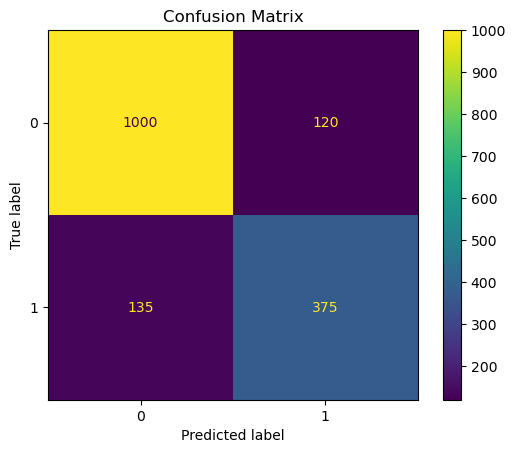

In [11]:
# Predict the target variable for the test data using the final model
y_pred_final = random_search.predict(X_test)

# Calculate accuracy
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Accuracy:", accuracy_final)

# Generate the confusion matrix
confusion_matrix_final = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:")
print(confusion_matrix_final)

# Plot the confusion matrix
plot_confusion_matrix(random_search, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()